# Krystyn Gutu
## Machine Learning | Professor Sarbanes | Project 1 | Tuesday, March 1, 2022

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import googlefinance

### Project 1: Build a trading (security) strategy for future stock purchases based on historical values.

# General Motors Analysis

# Step 1: Pre-Process & Clean the Data

### Importing data

In [2]:
# Calculate 01.01.2015 minus 300 days (in order to calculate 200 moving day averages from 01.01.2015 onward, later on)
# Subtracted 300 days to be safe

import datetime

starting_date = datetime.date(2015, 1, 1)
days = datetime.timedelta(300)

new_starting_date = starting_date - days

print(new_starting_date)

2014-03-07


In [3]:
gm = yf.download("GM", start = new_starting_date, end = "2021-12-31")

[*********************100%***********************]  1 of 1 completed


### Cleaning null values & analyzing basic data info

<AxesSubplot:xlabel='Date', ylabel='Close'>

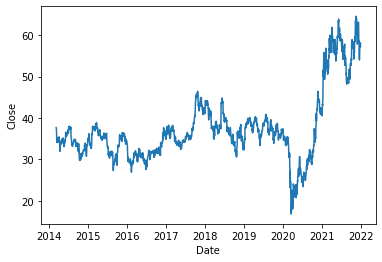

In [4]:
# Drop the missing values and plot the closing for each day

gm = gm.dropna(axis = 0)
sns.lineplot(x =  gm.index, y = "Close", data = gm)

In [5]:
gm.isnull().values.any()

False

In [6]:
gm.shape

(1970, 6)

In [7]:
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
gm["Adj Close Next Day"] = gm["Adj Close"].shift(periods = -1)
gm.tail()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Date,,,,,,,
2021-12-23,56.070000,57.090000,55.770000,56.910000,56.910000,13722300,57.430000
2021-12-27,56.889999,57.750000,56.529999,57.430000,57.430000,9078900,57.110001
2021-12-28,57.400002,58.119999,57.009998,57.110001,57.110001,8577700,57.230000
2021-12-29,57.110001,57.700001,56.740002,57.230000,57.230000,7982300,58.130001
2021-12-30,57.450001,58.779999,57.259998,58.130001,58.130001,11965900,NaN


In [9]:
gm = gm.dropna(axis = 0)

In [10]:
gm.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Adj Close Next Day'],
      dtype='object')

In [11]:
gm

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Date,,,,,,,
2014-03-07,37.939999,38.009998,37.450001,37.689999,29.130362,17547800,28.666632
2014-03-10,37.560001,37.560001,36.759998,37.090000,28.666632,17552600,27.190397
2014-03-11,37.000000,37.119999,35.020000,35.180000,27.190397,41033400,26.943071
2014-03-12,34.759998,35.250000,34.369999,34.860001,26.943071,46300500,26.347950
2014-03-13,35.040001,35.160000,33.869999,34.090000,26.347950,39628600,26.581873
...,...,...,...,...,...,...,...
2021-12-22,54.790001,56.349998,54.750000,56.080002,56.080002,16694000,56.910000
2021-12-23,56.070000,57.090000,55.770000,56.910000,56.910000,13722300,57.430000
2021-12-27,56.889999,57.750000,56.529999,57.430000,57.430000,9078900,57.110001


In [12]:
gm.shape

(1969, 7)

In [13]:
gm.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1969.0,3.744464e+01,8.383490e+00,1.634000e+01,3.240000e+01,3.568000e+01,3.898000e+01,6.433000e+01
High,1969.0,3.785972e+01,8.480558e+00,1.856000e+01,3.285000e+01,3.600000e+01,3.938000e+01,6.518000e+01
Low,1969.0,3.697996e+01,8.270023e+00,1.433000e+01,3.199000e+01,3.533000e+01,3.867000e+01,6.269000e+01
Close,1969.0,3.742165e+01,8.383422e+00,1.680000e+01,3.234000e+01,3.567000e+01,3.901000e+01,6.461000e+01
Adj Close,1969.0,3.420167e+01,9.627769e+00,1.680000e+01,2.721348e+01,3.169251e+01,3.708411e+01,6.461000e+01
Volume,1969.0,1.417007e+07,7.290168e+06,2.899300e+06,9.500000e+06,1.246440e+07,1.656240e+07,6.766720e+07
Adj Close Next Day,1969.0,3.421640e+01,9.642177e+00,1.680000e+01,2.721348e+01,3.169880e+01,3.710264e+01,6.461000e+01


### Correlations

In [14]:
gm.corr(method = "pearson")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.998698,0.998606,0.997524,0.966709,0.124904,0.963098
High,0.998698,1.000000,0.998144,0.998847,0.970285,0.140949,0.966636
Low,0.998606,0.998144,1.000000,0.998757,0.965149,0.104213,0.961454
Close,0.997524,0.998847,0.998757,1.000000,0.968621,0.123563,0.964873
Adj Close,0.966709,0.970285,0.965149,0.968621,1.000000,0.111868,0.997044
Volume,0.124904,0.140949,0.104213,0.123563,0.111868,1.000000,0.114355
Adj Close Next Day,0.963098,0.966636,0.961454,0.964873,0.997044,0.114355,1.000000


In [15]:
gm.corr(method = "spearman")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.997330,0.997106,0.994482,0.920870,-0.038544,0.915097
High,0.997330,1.000000,0.996574,0.997405,0.926286,-0.025319,0.920557
Low,0.997106,0.996574,1.000000,0.997584,0.919951,-0.058224,0.914376
Close,0.994482,0.997405,0.997584,1.000000,0.924316,-0.042459,0.918750
Adj Close,0.920870,0.926286,0.919951,0.924316,1.000000,-0.087201,0.995236
Volume,-0.038544,-0.025319,-0.058224,-0.042459,-0.087201,1.000000,-0.086199
Adj Close Next Day,0.915097,0.920557,0.914376,0.918750,0.995236,-0.086199,1.000000


In [16]:
gm.corr(method = "kendall")

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day
Open,1.000000,0.964014,0.960516,0.942519,0.777827,-0.031710,0.765540
High,0.964014,1.000000,0.957547,0.962952,0.787601,-0.022648,0.773785
Low,0.960516,0.957547,1.000000,0.965007,0.779664,-0.045579,0.766061
Close,0.942519,0.962952,0.965007,1.000000,0.789835,-0.034875,0.773145
Adj Close,0.777827,0.787601,0.779664,0.789835,1.000000,-0.067368,0.944888
Volume,-0.031710,-0.022648,-0.045579,-0.034875,-0.067368,1.000000,-0.066750
Adj Close Next Day,0.765540,0.773785,0.766061,0.773145,0.944888,-0.066750,1.000000


### Plotting Data

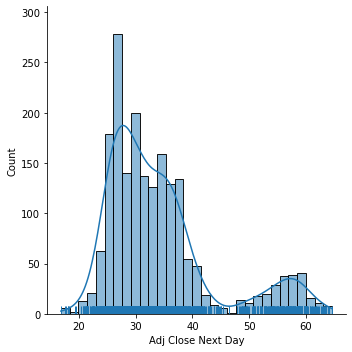

In [17]:
sns.displot(gm["Adj Close Next Day"], kde = True, rug = True)

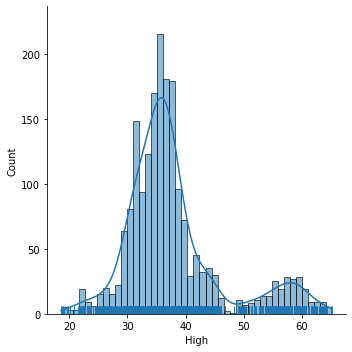

In [18]:
sns.displot(gm["High"], kde = True, rug = True)

## Strategy 1: "buy" = next trading day's close price > today's close price; otherwise, "sell"

In [19]:
strategy_1 = gm.copy()

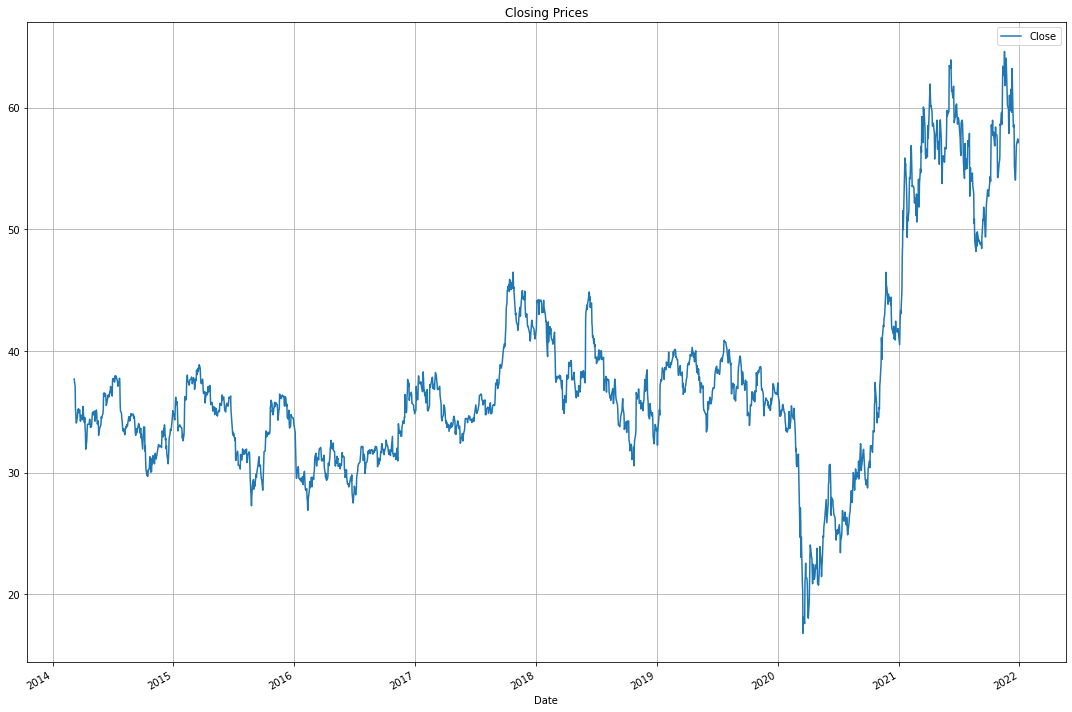

In [20]:
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
strategy_1[["Close"]].plot(figsize = (15, 10), grid = True, title = "Closing Prices", ax = axes)

axes.legend()
fig.tight_layout()

In [21]:
strategy_1["y_1"] = np.where(strategy_1["Close"].shift(-1) > strategy_1["Close"], 1, -1)

In [22]:
strategy_1.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,y_1
Date,,,,,,,,
2014-03-07,37.939999,38.009998,37.450001,37.689999,29.130362,17547800,28.666632,-1
2014-03-10,37.560001,37.560001,36.759998,37.090000,28.666632,17552600,27.190397,-1
2014-03-11,37.000000,37.119999,35.020000,35.180000,27.190397,41033400,26.943071,-1
2014-03-12,34.759998,35.250000,34.369999,34.860001,26.943071,46300500,26.347950,-1
2014-03-13,35.040001,35.160000,33.869999,34.090000,26.347950,39628600,26.581873,-1


## Strategy 2: utilize 50-day MA for short-term MA & 200-day MA for long-term MA
#### Target variable (y), also known as the signal, should either be a buy signal (y = 1) or sell signal (y = -1) of the stock based on feature variables (x). Golden Cross = short-term MA crossing above a long-term MA, suggesting a bullish (buying) signal; Death Cross = short-term MA crossing below a long-term MA, suggesting a bearish (selling) signal.

In [23]:
strategy_2 = gm.copy()

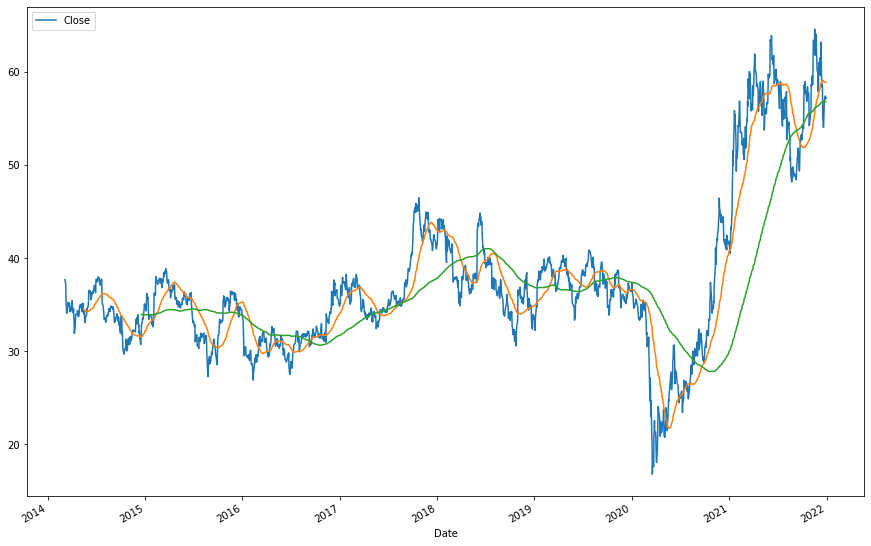

In [24]:
strategy_2[["Close"]].plot()

strategy_2["50 Day Moving Average"] = strategy_2.rolling(50).mean()["Close"].plot(figsize = (15, 10))
strategy_2["200 Day Moving Average"] = strategy_2.rolling(200).mean()["Close"].plot(figsize = (15, 10))

axes.legend()
fig.tight_layout()

In [25]:
strategy_2["50 Day Moving Average"] = strategy_2["Close"].rolling(50).mean()
strategy_2["200 Day Moving Average"] = strategy_2["Close"].rolling(200).mean()

strategy_2.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,50 Day Moving Average,200 Day Moving Average
Date,,,,,,,,,
2014-12-18,31.639999,31.750000,31.170000,31.750000,25.406837,14112000,26.255068,31.5068,33.97545
2014-12-19,31.760000,32.930000,31.750000,32.810001,26.255068,18990900,26.591152,31.5424,33.95105
2014-12-22,32.630001,33.310001,32.619999,33.230000,26.591152,13243700,26.855227,31.6012,33.93175
2014-12-23,33.480000,33.700001,33.380001,33.560001,26.855227,8469500,26.751200,31.6766,33.92365
2014-12-24,33.529999,33.590000,33.240002,33.430000,26.751200,4496000,26.991262,31.7430,33.91650


In [26]:
strategy_2["y_2"] = np.where(strategy_2["50 Day Moving Average"] > strategy_2["200 Day Moving Average"], 1, -1)

# Step 2: Define the Feature Variable "X" & Label/Target Variable "y"

In [27]:
strategy_1.isnull().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Adj Close Next Day    False
y_1                   False
dtype: bool

In [28]:
strategy_2.isnull().any()

Open                      False
High                      False
Low                       False
Close                     False
Adj Close                 False
Volume                    False
Adj Close Next Day        False
50 Day Moving Average      True
200 Day Moving Average     True
y_2                       False
dtype: bool

In [29]:
mask = False
for col in strategy_2.columns: 
    mask = mask | strategy_2[col].isnull()
strategy_2_nulls = strategy_2[mask]
print(strategy_2_nulls)

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-03-07  37.939999  38.009998  37.450001  37.689999  29.130362  17547800   
2014-03-10  37.560001  37.560001  36.759998  37.090000  28.666632  17552600   
2014-03-11  37.000000  37.119999  35.020000  35.180000  27.190397  41033400   
2014-03-12  34.759998  35.250000  34.369999  34.860001  26.943071  46300500   
2014-03-13  35.040001  35.160000  33.869999  34.090000  26.347950  39628600   
...               ...        ...        ...        ...        ...       ...   
2014-12-11  32.139999  32.689999  31.990000  32.189999  25.758932  13282600   
2014-12-12  31.940001  32.160000  31.570000  31.570000  25.262796  11239100   
2014-12-15  31.700001  31.770000  30.980000  31.000000  24.806671  16084000   
2014-12-16  30.620001  31.059999  30.299999  30.730000  24.590618  24294000   
2014-12-17  30.809999  31.299999  30.639999  31.1500

In [30]:
strategy_2 = strategy_2[208:]

In [31]:
strategy_2.isnull().any()

Open                      False
High                      False
Low                       False
Close                     False
Adj Close                 False
Volume                    False
Adj Close Next Day        False
50 Day Moving Average     False
200 Day Moving Average    False
y_2                       False
dtype: bool

In [32]:
strategy_2

,Open,High,Low,Close,Adj Close,Volume,Adj Close Next Day,50 Day Moving Average,200 Day Moving Average,y_2
Date,,,,,,,,,,
2015-01-02,35.270000,35.310001,34.410000,34.840000,27.879501,9756700,27.471392,32.1854,33.91790,-1
2015-01-05,34.980000,35.250000,34.070000,34.330002,27.471392,16223000,27.887499,32.2458,33.91325,-1
2015-01-06,34.410000,35.220001,34.099998,34.849998,27.887499,17747600,28.679722,32.3242,33.91245,-1
2015-01-07,35.230000,35.950001,35.040001,35.840000,28.679722,19319200,28.967789,32.4402,33.91595,-1
2015-01-08,36.060001,36.450001,35.799999,36.200001,28.967789,15206600,28.479658,32.5626,33.92440,-1
...,...,...,...,...,...,...,...,...,...,...
2021-12-22,54.790001,56.349998,54.750000,56.080002,56.080002,16694000,56.910000,58.9190,56.81355,1
2021-12-23,56.070000,57.090000,55.770000,56.910000,56.910000,13722300,57.430000,58.9018,56.81645,1
2021-12-27,56.889999,57.750000,56.529999,57.430000,57.430000,9078900,57.110001,58.8966,56.80730,1


In [33]:
X1 = strategy_1.iloc[:, : -1].values
y1 = strategy_1.iloc[:, -1].values

X2 = strategy_2.iloc[:, : -1].values
y2 = strategy_2.iloc[:, -1].values

# Step 3: Split Data into Training & Test Sets (Use 80/20 Percent Ratio)

### Pre-Processing & Training the Test Split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [36]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# Step 4: Choose a Classifier & Fit It on the Training Set (Take Default Parameters)

### Training and Predictions

In [37]:
strategy_1["y_1"].value_counts()

 1    1001
-1     968
Name: y_1, dtype: int64

In [38]:
strategy_2["y_2"].value_counts()

 1    914
-1    847
Name: y_2, dtype: int64

### 1) K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn import metrics
from sklearn.metrics import f1_score

In [40]:
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [41]:
accuracy_train = accuracy_score(y1_train, knn1.predict(X1_train))
accuracy_test = accuracy_score(y1_test, knn1.predict(X1_test))
print("KNN1 Accuracy Score (Training): %.6f" %accuracy_train)
print("KNN1 Accuracy Score (Testing): %.6f" %accuracy_test)

print("\n")

accuracy_train = accuracy_score(y2_train, knn2.predict(X2_train))
accuracy_test = accuracy_score(y2_test, knn2.predict(X2_test))
print("KNN2 Accuracy Score (Training): %.6f" %accuracy_train)
print("KNN2 Accuracy Score (Testing): %.6f" %accuracy_test)

KNN1 Accuracy Score (Training): 0.766349
KNN1 Accuracy Score (Testing): 0.565990


KNN2 Accuracy Score (Training): 0.960227
KNN2 Accuracy Score (Testing): 0.929178


In [42]:
print("KNN1 Accuracy Using Cross-Validation: ", cross_val_score(knn1, X1_train, y1_train, cv = 5))
print("KNN2 Accuracy Using Cross-Validation: ", cross_val_score(knn2, X2_train, y2_train, cv = 5))

KNN1 Accuracy Using Cross-Validation:  [0.6        0.5968254  0.56190476 0.57777778 0.58730159]
KNN2 Accuracy Using Cross-Validation:  [0.90780142 0.87588652 0.92907801 0.95017794 0.93950178]


### 2) Random Forest Classifier (RF)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y1_train)

rf2 = RandomForestClassifier()
rf2.fit(X2_train, y2_train)

RandomForestClassifier()

In [45]:
accuracy_train = accuracy_score(y1_train, rf1.predict(X1_train))
accuracy_test = accuracy_score(y1_test, rf1.predict(X1_test))
print("RF1 Accuracy Score (Training): %.6f" %accuracy_train)
print("RF1 Accuracy Score (Testing): %.6f" %accuracy_test)

print("\n")

accuracy_train = accuracy_score(y2_train, rf2.predict(X2_train))
accuracy_test = accuracy_score(y2_test, rf2.predict(X2_test))
print("RF2 Accuracy Score (Training): %.6f" %accuracy_train)
print("RF2 Accuracy Score (Testing): %.6f" %accuracy_test)

RF1 Accuracy Score (Training): 1.000000
RF1 Accuracy Score (Testing): 0.700508


RF2 Accuracy Score (Training): 1.000000
RF2 Accuracy Score (Testing): 0.991501


In [46]:
print("RF1 Accuracy Using Cross-Validation: ", cross_val_score(rf1, X1_train, y1_train, cv = 5))
print("RF2 Accuracy Using Cross-Validation: ", cross_val_score(rf2, X2_train, y2_train, cv = 5))

RF1 Accuracy Using Cross-Validation:  [0.75873016 0.72698413 0.66349206 0.72380952 0.6984127 ]
RF2 Accuracy Using Cross-Validation:  [0.9822695  0.97163121 0.9858156  0.99644128 0.97508897]


### 3) Gradient Boosting Classifier (GB)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [48]:
gb1 = GradientBoostingClassifier()
gb1.fit(X1_train, y1_train)

gb2 = GradientBoostingClassifier()
gb2.fit(X2_train, y2_train)

GradientBoostingClassifier()

In [49]:
print("GB1 Accuracy Score (Training): {0:.6f}".format(gb1.score(X1_train, y1_train)))
print("GB1 Accuracy Score (Testing): {0:.6f}".format(gb1.score(X1_test, y1_test)))

print("\n")

print("GB2 Accuracy Score (Training): {0:.6f}".format(gb2.score(X2_train, y2_train)))
print("GB2 Accuracy Score (Testing): {0:.6f}".format(gb2.score(X2_test, y2_test)))

GB1 Accuracy Score (Training): 0.925714
GB1 Accuracy Score (Testing): 0.761421


GB2 Accuracy Score (Training): 1.000000
GB2 Accuracy Score (Testing): 0.985836


In [50]:
print("GB1 Accuracy Using Cross-Validation: ", cross_val_score(gb1, X1_train, y1_train, cv = 5))
print("GB2 Accuracy Using Cross-Validation: ", cross_val_score(gb2, X2_train, y2_train, cv = 5))

GB1 Accuracy Using Cross-Validation:  [0.76190476 0.74920635 0.76190476 0.76825397 0.77460317]
GB2 Accuracy Using Cross-Validation:  [0.9822695  0.97163121 0.9893617  0.99288256 0.98220641]


### 4) Support Vector Machines (SVM)

In [51]:
from sklearn.svm import SVC

In [52]:
lsvm1 = SVC()
lsvm1.fit(X1_train, y1_train)

lsvm2 = SVC()
lsvm2.fit(X2_train, y2_train)

SVC()

In [53]:
print("LSVM1 Accuracy Score (Training): {0:.6f}".format(lsvm1.score(X1_train, y1_train)))
print("LSVM1 Accuracy Score (Testing): {0:.6f}".format(lsvm1.score(X1_test, y1_test)))

print("\n")

print("LSVM2 Accuracy Score (Training): {0:.6f}".format(lsvm2.score(X2_train, y2_train)))
print("LSVM2 Accuracy Score (Testing): {0:.6f}".format(lsvm2.score(X2_test, y2_test)))

LSVM1 Accuracy Score (Training): 0.680635
LSVM1 Accuracy Score (Testing): 0.624365


LSVM2 Accuracy Score (Training): 0.955256
LSVM2 Accuracy Score (Testing): 0.934844


In [54]:
print("LSVM1 Accuracy Using Cross-Validation: ", cross_val_score(lsvm1, X1_train, y1_train, cv = 5))
print("LSVM2 Accuracy Using Cross-Validation: ", cross_val_score(lsvm2, X2_train, y2_train, cv = 5))

LSVM1 Accuracy Using Cross-Validation:  [0.64761905 0.62857143 0.62539683 0.66349206 0.63492063]
LSVM2 Accuracy Using Cross-Validation:  [0.94326241 0.90780142 0.96453901 0.95017794 0.95729537]


### 5) XGBoost Classifier (XGB)

In [55]:
import xgboost
from xgboost import XGBClassifier

In [56]:
xgb1 = XGBClassifier()
xgb1.fit(X1_train, y1_train)

xgb2 = XGBClassifier()
xgb2.fit(X2_train, y2_train)

C:\Users\kryst\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
print("XGB1 Accuracy Score (Training): {0:.6f}".format(xgb1.score(X1_train, y1_train)))
print("XGB1 Accuracy Score (Testing): {0:.6f}".format(xgb1.score(X1_test, y1_test)))

print("\n")

print("XGB2 Accuracy Score (Training): {0:.6f}".format(xgb2.score(X2_train, y2_train)))
print("XGB2 Accuracy Score (Testing): {0:.6f}".format(xgb2.score(X2_test, y2_test)))

XGB1 Accuracy Score (Training): 0.998095
XGB1 Accuracy Score (Testing): 0.837563


XGB2 Accuracy Score (Training): 1.000000
XGB2 Accuracy Score (Testing): 0.985836


### 6) Naive Bayes (NB)

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
xgb1 = XGBClassifier()
xgb1.fit(X1_train, y1_train)

xgb2 = XGBClassifier()
xgb2.fit(X2_train, y2_train)

[08:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kryst\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Step 5: Evaluate the Classifier on the Test Set

In [60]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 1) K-Nearest Neighbors (KNN)

In [61]:
knn1_y_pred = knn1.predict(X1_test)
knn2_y_pred = knn2.predict(X2_test)

In [62]:
print("KNN1 F1-Score (Testing): ", f1_score(y1_test, knn1_y_pred))
print("KNN2 F1-Score (Testing): ", f1_score(y2_test, knn2_y_pred))

KNN1 F1-Score (Testing):  0.6013986013986014
KNN2 F1-Score (Testing):  0.9295774647887324


In [63]:
print("KNN1 Precision Score: ", precision_score(y1_test, knn1_y_pred))
print("KNN2 Precision Score: ", precision_score(y2_test, knn2_y_pred))

KNN1 Precision Score:  0.57847533632287
KNN2 Precision Score:  0.9322033898305084


In [64]:
print("KNN1 Recall Score: ", recall_score(y1_test, knn1_y_pred))
print("KNN2 Recall Score: ", recall_score(y2_test, knn2_y_pred))

KNN1 Recall Score:  0.6262135922330098
KNN2 Recall Score:  0.9269662921348315


In [65]:
knn1_roc_auc_curve = roc_auc_score(y1_test, knn1_y_pred)
print("KNN1 ROC-AUC-Curve: ", knn1_roc_auc_curve)
knn2_roc_auc_curve = roc_auc_score(y2_test, knn2_y_pred)
print("KNN2 ROC-AUC-Curve: ", knn2_roc_auc_curve)

KNN1 ROC-AUC-Curve:  0.5631067961165048
KNN2 ROC-AUC-Curve:  0.9291974317817014


In [66]:
print("K-Nearest-Neighbor Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, knn1_y_pred))

K-Nearest-Neighbor Strategy 1 
Confusion Matrix: 
 [[ 94  94]
 [ 77 129]]


In [67]:
print("K-Nearest-Neighbor Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, knn2_y_pred))

K-Nearest-Neighbor Strategy 2 
Confusion Matrix: 
 [[163  12]
 [ 13 165]]


In [68]:
print("K-Nearest-Neighbor Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, knn1_y_pred))

K-Nearest-Neighbor Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.55      0.50      0.52       188
           1       0.58      0.63      0.60       206

    accuracy                           0.57       394
   macro avg       0.56      0.56      0.56       394
weighted avg       0.56      0.57      0.56       394



In [69]:
print("K-Nearest-Neighbor Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, knn2_y_pred))

K-Nearest-Neighbor Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.93      0.93      0.93       175
           1       0.93      0.93      0.93       178

    accuracy                           0.93       353
   macro avg       0.93      0.93      0.93       353
weighted avg       0.93      0.93      0.93       353



### 2) Random Forest Classifier (RF)

In [70]:
rf1_y_pred = rf1.predict(X1_test)
rf2_y_pred = rf2.predict(X2_test)

In [71]:
print("RF1 F1-Score (Testing): ", f1_score(y1_test, rf1_y_pred))
print("RF2 F1-Score (Testing): ", f1_score(y2_test, rf2_y_pred))

RF1 F1-Score (Testing):  0.7216981132075473
RF2 F1-Score (Testing):  0.9916434540389973


In [72]:
print("RF1 Precision Score: ", precision_score(y1_test, rf1_y_pred))
print("RF2 Precision Score: ", precision_score(y2_test, rf2_y_pred))

RF1 Precision Score:  0.7018348623853211
RF2 Precision Score:  0.9834254143646409


In [73]:
print("RF1 Recall Score: ", recall_score(y1_test, rf1_y_pred))
print("RF2 Recall Score: ", recall_score(y2_test, rf2_y_pred))

RF1 Recall Score:  0.7427184466019418
RF2 Recall Score:  1.0


In [74]:
rf1_roc_auc_curve = roc_auc_score(y1_test, rf1_y_pred)
print("RF1 ROC-AUC-Curve: ", rf1_roc_auc_curve)
rf2_roc_auc_curve = roc_auc_score(y2_test, rf2_y_pred)
print("RF2 ROC-AUC-Curve: ", rf2_roc_auc_curve)

RF1 ROC-AUC-Curve:  0.6984868828754389
RF2 ROC-AUC-Curve:  0.9914285714285714


In [75]:
print("Random Forest Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, rf1_y_pred))

Random Forest Strategy 1 
Confusion Matrix: 
 [[123  65]
 [ 53 153]]


In [76]:
print("Random Forest Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, rf2_y_pred))

Random Forest Strategy 2 
Confusion Matrix: 
 [[172   3]
 [  0 178]]


In [77]:
print("Random Forest Strategy 1 \nClassification Report: \n", classification_report(y1_test, rf1_y_pred))

Random Forest Strategy 1 
Classification Report: 
               precision    recall  f1-score   support

          -1       0.70      0.65      0.68       188
           1       0.70      0.74      0.72       206

    accuracy                           0.70       394
   macro avg       0.70      0.70      0.70       394
weighted avg       0.70      0.70      0.70       394



In [78]:
print("Random Forest Strategy 2 \nClassification Report: \n", classification_report(y2_test, rf2_y_pred))

Random Forest Strategy 2 
Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.98      0.99       175
           1       0.98      1.00      0.99       178

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



### 3) Gradient Boosting Classifier (GB)

In [79]:
gb1_y_pred = gb1.predict(X1_test)
gb2_y_pred = gb2.predict(X2_test)

In [80]:
print("GB1 F1-Score: ", f1_score(y1_test, gb1_y_pred))
print("GB2 F1-Score: ", f1_score(y2_test, gb2_y_pred))

GB1 F1-Score:  0.7718446601941746
GB2 F1-Score:  0.9861495844875346


In [81]:
print("GB1 Precision Score: ", precision_score(y1_test, gb1_y_pred))
print("GB2 Precision Score: ", precision_score(y2_test, gb2_y_pred))

GB1 Precision Score:  0.7718446601941747
GB2 Precision Score:  0.9726775956284153


In [82]:
print("GB1 Recall Score: ", recall_score(y1_test, gb1_y_pred))
print("GB2 Recall Score: ", recall_score(y2_test, gb2_y_pred))

GB1 Recall Score:  0.7718446601941747
GB2 Recall Score:  1.0


In [83]:
gb1_roc_auc_curve = roc_auc_score(y1_test, gb1_y_pred)
print("GB1 ROC-AUC-Curve: ", gb1_roc_auc_curve)
gb2_roc_auc_curve = roc_auc_score(y2_test, gb2_y_pred)
print("GB2 ROC-AUC-Curve: ", gb2_roc_auc_curve)

GB1 ROC-AUC-Curve:  0.7609223300970873
GB2 ROC-AUC-Curve:  0.9857142857142857


In [84]:
print("Gradient Boosting Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Confusion Matrix: 
 [[141  47]
 [ 47 159]]


In [85]:
print("Gradient Boosting Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Confusion Matrix: 
 [[170   5]
 [  0 178]]


In [86]:
print("Gradient Boosting Strategy 1 \nClassification Report: \n", classification_report(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Classification Report: 
               precision    recall  f1-score   support

          -1       0.75      0.75      0.75       188
           1       0.77      0.77      0.77       206

    accuracy                           0.76       394
   macro avg       0.76      0.76      0.76       394
weighted avg       0.76      0.76      0.76       394



In [87]:
print("Gradient Boosting Strategy 2 \nClassification Report: \n", classification_report(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.97      0.99       175
           1       0.97      1.00      0.99       178

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



### 4) Support Vector Machines (SVM)

In [88]:
lsvm1_y_pred = lsvm1.predict(X1_test)
lsvm2_y_pred = lsvm2.predict(X2_test)

In [89]:
print("LSVM1 F1-Score: ", f1_score(y1_test, lsvm1_y_pred))
print("LSVM2 F1-Score: ", f1_score(y2_test, lsvm2_y_pred))

LSVM1 F1-Score:  0.6574074074074074
LSVM2 F1-Score:  0.9362880886426592


In [90]:
print("LSVM1 Precision Score: ", precision_score(y1_test, lsvm1_y_pred))
print("LSVM2 Precision Score: ", precision_score(y2_test, lsvm2_y_pred))

LSVM1 Precision Score:  0.6283185840707964
LSVM2 Precision Score:  0.9234972677595629


In [91]:
print("LSVM1 Recall Score: ", recall_score(y1_test, lsvm1_y_pred))
print("LSVM2 Recall Score: ", recall_score(y2_test, lsvm2_y_pred))

LSVM1 Recall Score:  0.6893203883495146
LSVM2 Recall Score:  0.949438202247191


In [92]:
lsvm1_roc_auc_curve = roc_auc_score(y1_test, lsvm1_y_pred)
print("LSVM1 ROC-AUC-Curve: ", lsvm1_roc_auc_curve)
lsvm2_roc_auc_curve = roc_auc_score(y2_test, lsvm2_y_pred)
print("LSVM2 ROC-AUC-Curve: ", lsvm2_roc_auc_curve)

LSVM1 ROC-AUC-Curve:  0.6212559388556085
LSVM2 ROC-AUC-Curve:  0.9347191011235956


In [93]:
print("Linear Support Vector Machine Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, lsvm1_y_pred))

Linear Support Vector Machine Strategy 1 
Confusion Matrix: 
 [[104  84]
 [ 64 142]]


In [94]:
print("Linear Support Vector Machine Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, lsvm2_y_pred))

Linear Support Vector Machine Strategy 2 
Confusion Matrix: 
 [[161  14]
 [  9 169]]


In [95]:
print("Linear Support Vector Machine Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, lsvm1_y_pred))

Linear Support Vector Machine Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.62      0.55      0.58       188
           1       0.63      0.69      0.66       206

    accuracy                           0.62       394
   macro avg       0.62      0.62      0.62       394
weighted avg       0.62      0.62      0.62       394



In [96]:
print("Linear Support Vector Machine Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, lsvm2_y_pred))

Linear Support Vector Machine Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.95      0.92      0.93       175
           1       0.92      0.95      0.94       178

    accuracy                           0.93       353
   macro avg       0.94      0.93      0.93       353
weighted avg       0.94      0.93      0.93       353



### 5) XGBoost Classifier (XGB)

In [97]:
xgb1_y_pred = xgb1.predict(X1_test)
xgb2_y_pred = xgb2.predict(X2_test)

In [98]:
print("XGB1 F1-Score: ", f1_score(y1_test, xgb1_y_pred))
print("XGB2 F1-Score: ", f1_score(y2_test, xgb2_y_pred))

XGB1 F1-Score:  0.8407960199004973
XGB2 F1-Score:  0.9861495844875346


In [99]:
print("XGB1 Precision Score: ", precision_score(y1_test, xgb1_y_pred))
print("XGB2 Precision Score: ", precision_score(y2_test, xgb2_y_pred))

XGB1 Precision Score:  0.8622448979591837
XGB2 Precision Score:  0.9726775956284153


In [100]:
print("XGB1 Recall Score: ", recall_score(y1_test, xgb1_y_pred))
print("XGB2 Recall Score: ", recall_score(y2_test, xgb2_y_pred))

XGB1 Recall Score:  0.8203883495145631
XGB2 Recall Score:  1.0


In [101]:
xgb1_roc_auc_curve = roc_auc_score(y1_test, xgb1_y_pred)
print("XGB1 ROC-AUC-Curve: ", xgb1_roc_auc_curve)
xgb2_roc_auc_curve = roc_auc_score(y2_test, xgb2_y_pred)
print("XGB2 ROC-AUC-Curve: ", xgb2_roc_auc_curve)

XGB1 ROC-AUC-Curve:  0.8383856641189836
XGB2 ROC-AUC-Curve:  0.9857142857142857


In [102]:
from sklearn.metrics import mean_squared_error

square_root1 = np.sqrt(mean_squared_error(y1_test, xgb1_y_pred))
print("XGB1 Square Root: %f" % (square_root1))

square_root2 = np.sqrt(mean_squared_error(y2_test, xgb2_y_pred))
print("XGB2 Square Root: %f" % (square_root2))

XGB1 Square Root: 0.806068
XGB2 Square Root: 0.238028


In [103]:
print("XGBoost Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, xgb1_y_pred)) 

XGBoost Strategy 1 
Confusion Matrix: 
 [[161  27]
 [ 37 169]]


In [104]:
print("XGBoost Strategy 2 \nConfusion Matrix: \n", confusion_matrix(y2_test, xgb2_y_pred)) 

XGBoost Strategy 2 
Confusion Matrix: 
 [[170   5]
 [  0 178]]


In [105]:
print("XGBoost Strategy 1 \nClassification Matrix: \n", classification_report(y1_test, xgb1_y_pred))

XGBoost Strategy 1 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.81      0.86      0.83       188
           1       0.86      0.82      0.84       206

    accuracy                           0.84       394
   macro avg       0.84      0.84      0.84       394
weighted avg       0.84      0.84      0.84       394



In [106]:
print("XGBoost Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, xgb2_y_pred))

XGBoost Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       1.00      0.97      0.99       175
           1       0.97      1.00      0.99       178

    accuracy                           0.99       353
   macro avg       0.99      0.99      0.99       353
weighted avg       0.99      0.99      0.99       353



### All Classifiers

In [107]:
from sklearn import model_selection
from sklearn.metrics import log_loss
import matplotlib.ticker as mticker

In [108]:
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier()]

Strategy 1:
KNN 0.5701587301587302
RF 0.6977777777777777
GB 0.7619047619047619
SVM 0.6222222222222221
XGB 0.8488888888888889
[array([0.56952381, 0.55238095, 0.58857143]), array([0.72761905, 0.66666667, 0.69904762]), array([0.74857143, 0.77333333, 0.76380952]), array([0.62095238, 0.6247619 , 0.62095238]), array([0.8552381 , 0.83238095, 0.85904762])]


C:\Users\kryst\AppData\Local\Temp/ipykernel_26808/3361122385.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


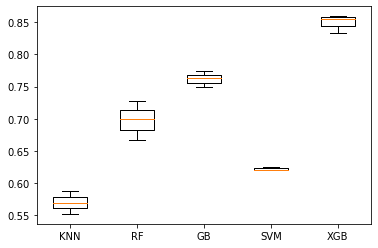

In [109]:
print("Strategy 1:")

models = []

def classification_Models(X1_train, X1_test, y1_train, y1_test):
    
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("GB", GradientBoostingClassifier()))
    models.append(("SVM", SVC()))
    models.append(("XGB", XGBClassifier()))
    
    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X1_train, y1_train, cv = 3, scoring = "accuracy", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(X1_train, X1_test, y1_train, y1_test)

Strategy 2:
KNN 0.9112310786493066
RF 0.9829545282705016
GB 0.9850942854118466
SVM 0.9382177259598663
XGB 0.9886388725067672
[array([0.89787234, 0.92963753, 0.90618337]), array([0.98297872, 0.98720682, 0.97867804]), array([0.97234043, 0.99360341, 0.98933902]), array([0.92765957, 0.93603412, 0.95095949]), array([0.98510638, 0.98933902, 0.99147122])]


C:\Users\kryst\AppData\Local\Temp/ipykernel_26808/947085309.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


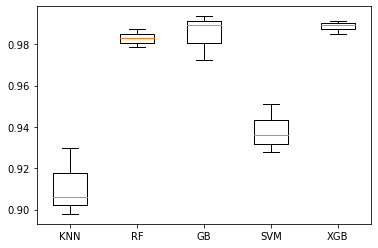

In [110]:
print("Strategy 2:")

models = []

def classification_Models(X2_train, X2_test, y2_train, y2_test ):
    
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("RF", RandomForestClassifier()))
    models.append(("GB", GradientBoostingClassifier()))
    models.append(("SVM", SVC()))
    models.append(("XGB", XGBClassifier()))
    
    modeloutcomes = []
    modelnames = []
    for name, model in models:
        v_results = cross_val_score(model, X2_train, y2_train, cv = 3, scoring = "accuracy", n_jobs = -1, verbose = 0)
        print(name, v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(X2_train, X2_test, y2_train, y2_test)

# Extra Credit: Tune some Classifiers (Any 1 Will Do) by Changing their Default Parameters

In [111]:
gb1_1 = GradientBoostingClassifier(n_estimators = 300, max_leaf_nodes = 10)
gb1_1.fit(X1_train, y1_train)
gb1_1_y_pred = gb1_1.predict(X1_test)

gb2_2 = GradientBoostingClassifier(n_estimators = 300, max_leaf_nodes = 10)
gb2_2.fit(X2_train, y2_train)
gb2_2_y_pred = gb2_2.predict(X2_test)

In [112]:
print("Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 1: \n")
for name, score in zip(strategy_1, gb1_1.feature_importances_):
    print(name, score)

Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 1: 

Open 0.021395737710867193
High 0.014352741597119896
Low 0.016313471365888243
Close 0.03257237291010054
Adj Close 0.43378484966129816
Volume 0.043336109583127023
Adj Close Next Day 0.4382447171715991


In [113]:
print("Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 2: \n")
for name, score in zip(strategy_2, gb2_2.feature_importances_):
    print(name, score)

Feature Importance of Gradient Boosting Classifier with Parameters, Strategy 2: 

Open 0.034590641618025
High 0.005435174182472936
Low 0.03192131725119227
Close 0.0034923477725093415
Adj Close 0.005360897060657217
Volume 0.00019027934662690848
Adj Close Next Day 0.006981265051902233
50 Day Moving Average 0.5594055340966758
200 Day Moving Average 0.3526225436199382


In [114]:
gb1 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0)
gb1.fit(X1_train, y1_train)
gb1_y_pred = gb1.predict(X1_test)
print("GB1 F1-Score (Testing): ", f1_score(y1_test, gb1_y_pred))
print("GB1 Accuracy Score (Training): {0:.6f}".format(gb1.score(X1_train, y1_train)))
print("GB1 Accuracy Score (Testing): {0:.6f}".format(gb1.score(X1_test, y1_test)))

print("\n")

gb2 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.5, max_features = 2, max_depth = 2, random_state = 0)
gb2.fit(X2_train, y2_train)
gb2_y_pred = gb2.predict(X2_test)
print("GB2 F1-Score (Testing): ", f1_score(y2_test, gb2_y_pred))
print("GB2 Accuracy Score (Training): {0:.6f}".format(gb2.score(X2_train, y2_train)))
print("GB2 Accuracy Score (Testing): {0:.6f}".format(gb2.score(X2_test, y2_test)))

GB1 F1-Score (Testing):  0.6490384615384616
GB1 Accuracy Score (Training): 0.721905
GB1 Accuracy Score (Testing): 0.629442


GB2 F1-Score (Testing):  0.8777777777777778
GB2 Accuracy Score (Training): 0.910511
GB2 Accuracy Score (Testing): 0.875354


In [115]:
print("Gradient Boosting Strategy 1 \nConfusion Matrix: \n", confusion_matrix(y1_test, gb1_y_pred))

Gradient Boosting Strategy 1 
Confusion Matrix: 
 [[113  75]
 [ 71 135]]


In [116]:
print("Gradient Boosting Strategy 2 \nClassification Matrix: \n", classification_report(y2_test, gb2_y_pred))

Gradient Boosting Strategy 2 
Classification Matrix: 
               precision    recall  f1-score   support

          -1       0.88      0.86      0.87       175
           1       0.87      0.89      0.88       178

    accuracy                           0.88       353
   macro avg       0.88      0.88      0.88       353
weighted avg       0.88      0.88      0.88       353

